<a href="https://colab.research.google.com/github/Leeuenho/image_deep_learning/blob/main/05_image_convolution_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1차원 Convolution 실습

입력 데이터

- X = [2, 8, 3, 7, 1, 3, 0, 2, 5]
- W = [2, 8, 3, 7]

------------------------------
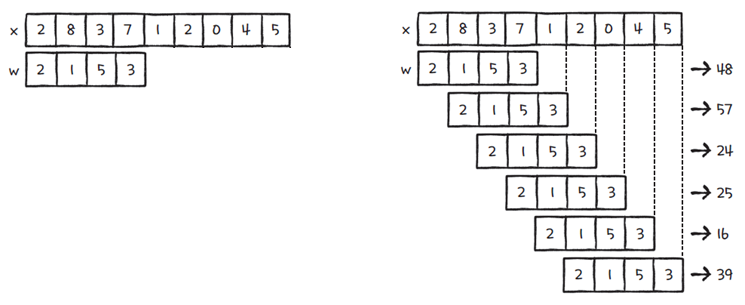








### 손으로 계산 연습
- 위 필터 W로 X를 1D Convolution한 연산 결과를 구하시오.
- Zero-padding을 3만큼 한 후 1D Convolution을 진행한 결과를 구하시오. 
- 1번과 2번의 결과값의 길이가 같은가? 같지 않다면 그 이유는 무엇인가? 

### Python 코딩
위의 1, 2번 과정을 Python으로 구현하여 계산한 후 그 결과값을 비교하시오. 



In [ ]:
import numpy as np

x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

'''
for i in range(len(x)-len(w)+1):
  m = []
  for j in range(i, len(w)+i):
    m = np.append(m, x[j]*w[j-i])
  print(sum(m), '\n')  
'''

#full-padding
'''
for i in range(len(w)-1):
  x = np.insert(x, 0, 0)
  x = np.append(x, 0)

print(x)

for i in range(len(x)-len(w)+1):
  m = []
  for j in range(i, len(w)+i):
    m = np.append(m, x[j]*w[j-i])
  print(sum(m), '\n')  
'''

#same padding

for i in range(len(w)-1):
  x = np.insert(x, 0, 0)

print(x)

for i in range(len(x)-len(w)+1):
  m = []
  for j in range(i, len(w)+i):
    m = np.append(m, x[j]*w[j-i])
  print(sum(m), '\n')  

[0 0 0 2 8 3 7 1 2 0 4 5]
6.0 

34.0 

51.0 

48.0 

57.0 

24.0 

25.0 

16.0 

39.0 



## 2차원 컨볼루션

아래 Python 코드에는 2D convolution이 구현되어 있다. 해당 함수를 분석한 뒤 아래 기능을 추가로 구현하시오. 

- 1) numpy vector화 연산함수 사용 (연산 시간 단축)
- 2) zero-padding
- 3) Edge detection
- 4) Image Sharpening
- 5) blurring





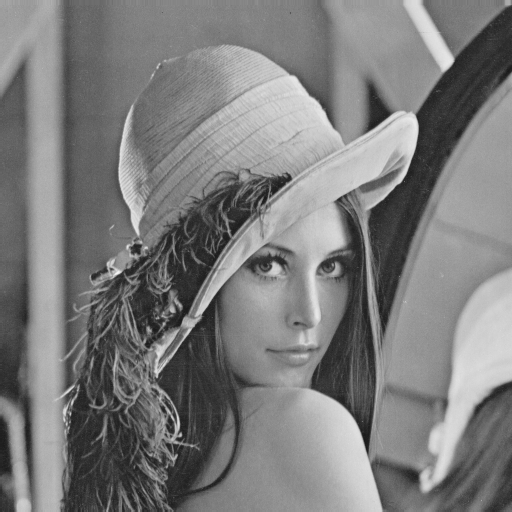

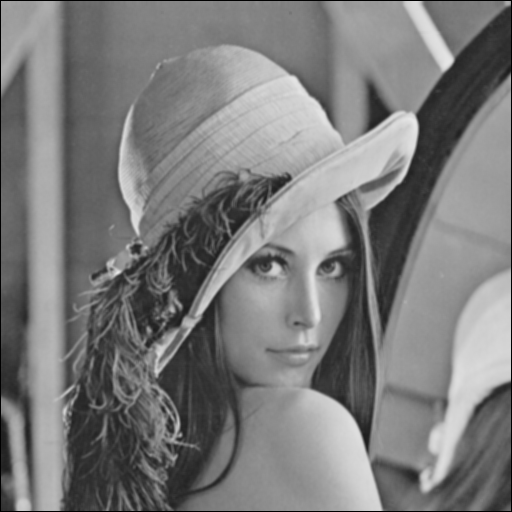

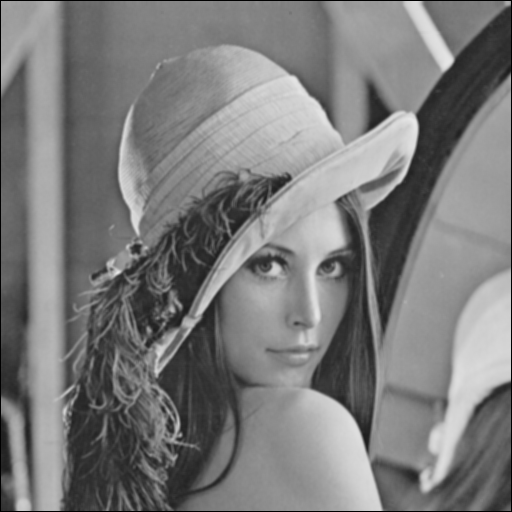

'\nsharp_result = Sharp(img_vec, filter)\ncv2_imshow(image)\ncv2_imshow(cv2.convertScaleAbs(sharp_result))\n'

In [ ]:
import numpy as np, cv2, time
from google.colab.patches import cv2_imshow
from skimage import io

  
def Conv2D(image, filter, padding=0):
    '''
    2D convolution 함수

    :param image: 입력 이미지
    :param filter: 컨볼루션 필터
    :param padding: 제로 패딩
    :return:
    '''

    rows, cols = image.shape[:2]
    # numpy vector화 연산함수 사용
    img_vec = np.asarray(image) 
    dst = np.zeros((rows, cols), np.float32)                  # 결과 저장 행렬
    xcenter, ycenter = filter.shape[1]//2, filter.shape[0]//2     # 마스크 중심 좌표

    for i in range(ycenter, rows - ycenter):                  # 입력 행렬 반복 순회
        for j in range(xcenter, cols - xcenter):
            sum = 0.0
            for u in range(filter.shape[0]):                    # 마스크 원소 순회
                for v in range(filter.shape[1]):
                    y, x = i + u - ycenter , j + v - xcenter
                    sum += image[y, x] * filter[u, v]           # convolution
            dst[i, j] = sum
    return dst

def Zero_Padding(im_vec, filter, padding = 0):
  #full-zero-padding
  zero_pad_img = np.pad(img_vec, ((filter.shape[0]-1, filter.shape[1]-1),(filter.shape[0]-1, filter.shape[1]-1)), mode = 'constant', constant_values = padding)
  return zero_pad_img

def Prewitt (img_vec):
    #edge detection - prewiitt
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
 

    dst_x = np.zeros((len(img_vec[0]), len(img_vec[1])), np.float32)
    dst_y = np.zeros((len(img_vec[0]), len(img_vec[1])), np.float32)
    dst = np.zeros((len(img_vec[0]), len(img_vec[1])), np.float32)
    
    
    #x축 prewitt
    xcenter_x, ycenter_x = prewitt_x.shape[1]//2, prewitt_x.shape[0]//2     # 마스크 중심 좌표

    for i in range(ycenter_x, len(img_vec[0]) - ycenter_x):                  # 입력 행렬 반복 순회
        for j in range(xcenter_x, len(img_vec[1]) - xcenter_x):
            sum = 0.0
            for u in range(prewitt_x.shape[0]):                    # 마스크 원소 순회
                for v in range(prewitt_x.shape[1]):
                    y, x = i + u - ycenter_x , j + v - xcenter_x
                    sum += img_vec[y, x] * prewitt_x[u, v]           # convolution
            dst_x[i, j] = sum

    #y축 prewitt
    xcenter_y, ycenter_y = prewitt_y.shape[1]//2, prewitt_y.shape[0]//2     # 마스크 중심 좌표

    for i in range(ycenter_y, len(img_vec[0]) - ycenter_y):                  # 입력 행렬 반복 순회
        for j in range(xcenter_y, len(img_vec[1]) - xcenter_y):
            sum = 0.0
            for u in range(prewitt_y.shape[0]):                    # 마스크 원소 순회
                for v in range(prewitt_y.shape[1]):
                    y, x = i + u - ycenter_y , j + v - xcenter_y
                    sum += img_vec[y, x] * prewitt_y[u, v]           # convolution
            dst_y[i, j] = sum
      
    dst = dst_x+dst_y
    return dst

def Sobel (img_vec):
    #edge detection - Sobel
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    dst_x = np.zeros((len(img_vec[0]), len(img_vec[1])), np.float32)
    dst_y = np.zeros((len(img_vec[0]), len(img_vec[1])), np.float32)
    dst = np.zeros((len(img_vec[0]), len(img_vec[1])), np.float32)

    #x축 sobel
    xcenter_x, ycenter_x = sobel_x.shape[1]//2, sobel_x.shape[0]//2     

    for i in range(ycenter_x, len(img_vec[0]) - ycenter_x):                 
        for j in range(xcenter_x, len(img_vec[1]) - xcenter_x):
            sum = 0.0
            for u in range(sobel_x.shape[0]):                  
                for v in range(sobel_x.shape[1]):
                    y, x = i + u - ycenter_x , j + v - xcenter_x
                    sum += img_vec[y, x] * sobel_x[u, v]        
            dst_x[i, j] = sum

    #y축 sobel
    xcenter_y, ycenter_y = sobel_y.shape[1]//2, sobel_y.shape[0]//2     

    for i in range(ycenter_y, len(img_vec[0]) - ycenter_y):                
        for j in range(xcenter_y, len(img_vec[1]) - xcenter_y):
            sum = 0.0
            for u in range(sobel_y.shape[0]):                   
                for v in range(sobel_y.shape[1]):
                    y, x = i + u - ycenter_y , j + v - xcenter_y
                    sum += img_vec[y, x] * sobel_y[u, v]          
            dst_y[i, j] = sum
      
    dst = dst_x+dst_y
    return dst

def Sharp(img_vec, filter):
  orig = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
  sharp = orig - filter
  
  line_img = Conv2D(img_vec, sharp)
  return img_vec + line_img

def Vector(image,filter):
  img_vec = np.asarray(image) 
  img_rows, img_cols = image.shape[:2]
  filter_rows, filter_cols = filter.shape[:2]

  dst = np.zeros((len(img_vec[0]), len(img_vec[1])), np.float32)
  xcenter, ycenter = filter.shape[1]//2, filter.shape[0]//2

  for i in range(img_rows-filter_rows+1):
    for j in range(img_cols - filter_cols+1):
      data = (img_vec[i:i+filter_rows,j:j+filter_cols]) * filter
      dst[ycenter+i, xcenter+j] = np.sum(data)
  return dst



image = io.imread('https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif') 

img_vec = np.asarray(image) 

# 블러링 마스크 원소 지정
filter = [1/9, 1/9, 1/9,
        1/9, 1/9, 1/9,
        1/9, 1/9, 1/9]

filter = np.array(filter, np.float32).reshape(3, 3)


conv2d_result = Conv2D(image, filter)   # convolution


cv2_imshow(image)
cv2_imshow(cv2.convertScaleAbs(conv2d_result))

a = Vector(image, filter)
cv2_imshow(cv2.convertScaleAbs(a))
'''

edge_result = Sobel(img_vec)
cv2_imshow(cv2.convertScaleAbs(edge_result))
'''
'''
sharp_result = Sharp(img_vec, filter)
cv2_imshow(image)
cv2_imshow(cv2.convertScaleAbs(sharp_result))
'''

In [ ]:
a = np.array([[1,1,1], [2,2,2], [3,3,3]])


#zero_pad_img = np.pad(img_vec, ((filter.shape[0]-1, filter.shape[1]-1),(filter.shape[0]-1, filter.shape[1]-1)), mode = 'constant', constant_values = 0)




c = np.array([[1,2,3],[0,1,2], [3,2,1]])

print(a*c)
print(np.matmul(a,c))



[[1 2 3]
 [0 2 4]
 [9 6 3]]
[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]
